<a id="top"></a>
# EXPLORATION OF LOAN DATASET FROM PROSPER
## by: Oni, Segun John
<br> <br> 
### Table of Content
- [Introduction](#intro)
- [Preliminary Wrangling](#prelim)
- [Questions on Features](#what)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#biva)
- [Multivariate Exploration](#multi)
- [Conclusion](#conclu)<br> <br> <br>

<a id="intro"></a>
## Introduction
---
I conducted an Exploratory Data Analysis (EDA) on a dataset from Prosper. Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since its inception, Prosper has facilitated more than \\$ 21 billion in loans to more than __1,280,000__ people. Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between \\$ 2,000 and \\$ 40,000. Individuals and institutions can invest in loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

The data set contains __113,937__ loans with __81__ variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, the latest payment information and many more.

<a id="prelim"></a>
## Preliminary Wrangling
___

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

### Loading dataset

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.shape

(113937, 81)

In [4]:
## Limiting the large dataset to the useful columns needed for this exploration
cols = ["Term", "CreditGrade", "LoanStatus", "BorrowerAPR", 
        "BorrowerRate", "LenderYield", "ProsperRating (Alpha)", 
        "ListingCategory (numeric)", "Occupation", "ProsperScore", "EmploymentStatus",
        "EmploymentStatusDuration", "LoanOriginalAmount", "LoanOriginationDate",
        "StatedMonthlyIncome", "DebtToIncomeRatio", "BorrowerState", "IsBorrowerHomeowner",
        "TotalProsperLoans"
]
loan = loan[cols]
loan.head()

,Term,CreditGrade,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ListingCategory (numeric),Occupation,ProsperScore,EmploymentStatus,EmploymentStatusDuration,LoanOriginalAmount,LoanOriginationDate,StatedMonthlyIncome,DebtToIncomeRatio,BorrowerState,IsBorrowerHomeowner,TotalProsperLoans
0,36,C,Completed,0.16516,0.1580,0.1380,NaN,0,Other,NaN,Self-employed,2.0,9425,2007-09-12 00:00:00,3083.333333,0.17,CO,True,NaN
1,36,NaN,Current,0.12016,0.0920,0.0820,A,2,Professional,7.0,Employed,44.0,10000,2014-03-03 00:00:00,6125.000000,0.18,CO,False,NaN
2,36,HR,Completed,0.28269,0.2750,0.2400,NaN,0,Other,NaN,Not available,NaN,3001,2007-01-17 00:00:00,2083.333333,0.06,GA,False,NaN
3,36,NaN,Current,0.12528,0.0974,0.0874,A,16,Skilled Labor,9.0,Employed,113.0,10000,2012-11-01 00:00:00,2875.000000,0.15,GA,True,NaN
4,36,NaN,Current,0.24614,0.2085,0.1985,D,2,Executive,4.0,Employed,44.0,15000,2013-09-20 00:00:00,9583.333333,0.26,MN,True,1.0


### Printing Statistics

In [5]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.describe())

(113937, 19)
                Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113912.000000  113937.000000  113937.000000   
mean       40.830248       0.218828       0.192764       0.182701   
std        10.436212       0.080364       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283810       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       ListingCategory (numeric)  ProsperScore  EmploymentStatusDuration  \
count              113937.000000  84853.000000             106312.000000   
mean                    2.774209      5.950067                 96.071582   
std                     3.996797      2.376501                 94.480605   
min                     0.000000      1.000000               

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
Term                         113937 non-null int64
CreditGrade                  28953 non-null object
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
ProsperScore                 84853 non-null float64
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
StatedMonthlyIncome          113937 non-null float64
DebtToIncomeRatio            105383 non-null float64
BorrowerState                108422 non-null object
IsBo

### Making a Copy of the dataset
---

In [7]:
loan_clean = loan.copy()

---
<span style="float:right" id="top"> [Back to Top](#top) </span>
<a id="what"></a>
### What is the structure of your dataset?

> In this dataset, there are 113,937 loans with 81 features. Most variables are numeric and categorical in nature. However, for the purpose of this study, I focused on a few columns which include: LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and some others.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in gaining insight into the features that affect borrower’s APR.

> According to <a href="https://www.foxbusiness.com/money/factors-impact-personal-loan-interest-rates">Fox Business</a> and <a href="https://www.cnbc.com/select/what-factors-lenders-consider-when-determining-apr/#:~:text=The%20better%20your%20score%2C%20the,considered%20more%20of%20a%20risk.">CNBC</a>, the seven (7) major factors that affect a loan's outcome status and a borrower's APR will be discussed. The factors are:
- __Credit score:__ It's a number assigned to borrowers to help lenders assess risk. A debtor's score will be based on his / her outstanding balances, repayment record, credit mix, and account/loan length.
- __Interest rate type (fixed or variable):__ Fixed-rate loans charge the same APR throughout the lifetime (term) of the loan. Variable-rate loans fluctuate, meaning you could potentially save money but also be charged more if rates go up.
- __Debt-to-income ratio:__ This is the amount of debt compared to gross income.
- __Employment history and income:__ Lenders want to know how you plan to pay back the loan, and they typically look at your employment history. Many lenders review the past 24 months of employment history, while some may go back further. They are looking for a solid track record of employment or a steady source of income.
- __Loan term and amount:__ This is the duration of the loan. The length of the loan will also impact your interest rate. Longer-term loans usually have higher rates than shorter loans.
- __Collateral:__ Giving out loans is a risky venture. Therefore, a lender wants an assurance that a borrower is able to pay back, and should he/she fail, what can the Lender fall back on that may guarantee the recovery of the loan first, and then interest for taking on risk.
- __Type of credit product:__ The lender will be interested in what you plan to use the funds for.
- __Location:__ Mortgages, in particular, are influenced by state and municipal governments. Every state may have unique taxes, property laws, grants and/or regulations that can impact what your mortgage will cost you.
- __Payment history:__ More on-time payments make you a competitive applicant for lower rates.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Though there are many features to explore, I suspect the following features will have the largest effect on the performance of loans:
- __EmploymentStatus__ - The employment status of the borrower at the time they posted the listing.
- __ProsperRating (Alpha)__ - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- __Term__ - The length of the loan is expressed in months.
- __BorrowerAPR__ - The Borrower's Annual Percentage Rate (APR) for the loan.
- __BorrowerRate__ - The Borrower's interest rate for this loan. 
- __LoanOriginalAmount__ - The origination amount of the loan.
- __StatedMonthlyIncome__- The monthly income the borrower stated at the time the listing was created.
- __IncomeRange__ - The income range of the borrower at the time the listing was created.
- __DebToIncomeRatio__ - The debt-to-income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt-to-income ratio is not available. This value is capped at 10.01 (any debt-to-income ratio larger than 1000% will be returned as 1001%).
- __CreditGrade__ - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

<span style="float:right">[Back to Top](#top)</span>
<a id="univariate"></a>
## Univariate Exploration
#### Here I'll look at the aforementioned features individually, so as to gain insight for deeper analysis, visualization and decision.
___

### Distribution of Credit Grade and Prosper Rating
As found on _Prosper's_ <a href="https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline">Blog</a> every loan application is assigned a rating using the proprietary system that allows them to maintain consistency in their evaluation.

In [8]:
# Assessing before cleaning
print("Total number of null value before cleaning: ", loan_clean['ProsperRating (Alpha)'].isnull().sum())
print("Total number of not null value before cleaning: ", loan_clean['ProsperRating (Alpha)'].notnull().sum())

# dropping null value
loan_clean['ProsperRating (Alpha)'].dropna(inplace=True)

# Testing after cleaning
print("Total number of null value after cleaning: ", loan_clean['ProsperRating (Alpha)'].isnull().sum())
print("Total number of not null value after cleaning: ", loan_clean['ProsperRating (Alpha)'].notnull().sum())

Total number of null value before cleaning:  29084
Total number of not null value before cleaning:  84853
Total number of null value after cleaning:  0
Total number of not null value after cleaning:  84853


#### Defining function for title and labels

In [9]:
# Function defining titles and labels going forward
def x_y_t(xL, yL, title):
    plt.title(title, fontsize=18)
    plt.xlabel(xL, fontsize=16)
    plt.ylabel(yL, fontsize=16);

In [10]:
# assigning counts of both columns
cg_order = ("AA", "A", "B", "C", "D", "E", "HR", "NC")
pr_A_order = ("AA", "A", "B", "C", "D", "E", "HR")

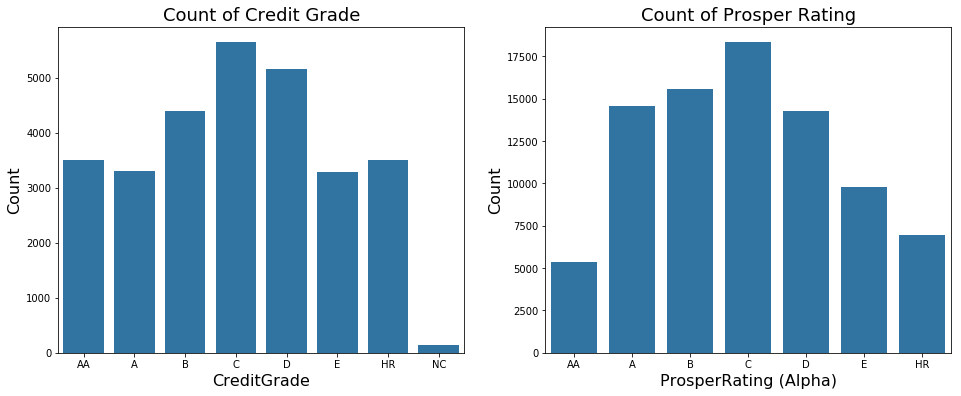

In [11]:
# Plotting counts against Credit Grade and Prosper Rating
base_color = sb.color_palette()[0]
plt.figure(figsize = [16, 6])

# Left plot: Distributions of Prosper Rating
plt.subplot(1,2,1)
sb.countplot(data=loan_clean, x=loan_clean['CreditGrade'], color=base_color, order=cg_order);
# Funtion definig labels and title
x_y_t('CreditGrade', 'Count', 'Count of Credit Grade')


# RIGHT plot: Distributions of Prosper Rating
plt.subplot(1,2,2)
sb.countplot(data=loan_clean, x=loan_clean['ProsperRating (Alpha)'], color=base_color, order=pr_A_order);
# Funtion definig labels and title
x_y_t('ProsperRating (Alpha)', 'Count', 'Count of Prosper Rating')

Both Credit Grade and Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor, which is based on the historical performance of loans with similar characteristics, both from The Fed and Prosper. According to Prosper, the ratings are:

- <u>__AA__: (0.00-1.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__A:__ (2.00–3.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__B:__ (4.00–5.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__C:__ (6.00–8.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__D:__ (9.00–11.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__E:__ (12.00–14.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__HR:__ (≥ 15.00%)</u>

From the analysis above it is observed that borrowers with <b>C</b> rating are the most on Prosepr, meaning that investors may loss their investment 6% - 9% of the time. 

Lenders may depend on this rating, to consciously deploy their funds and avoid the risk of loossing their funds


<u style="color:red">_Note:_</u>
Prosper <a href="https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline">declares</a> that estimated loss rates are not a guarantee and actual performance may differ from expected performance.

### Distribution of Purpose for Loan
To know the different purposes for taking a loan, I will look into the `ListingCategory` column. This should be a good confidence check for Lenders who may be concerned about what their funds will be committed to.

In [12]:
# Resetting the Values of Listing Category to make new column
old = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
      11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

new = ['Not Available', 'Debt Consolidation', 'Home Improvement','Business', 
       'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat',
       'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses',
       'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 
       'Wedding Loans']

# Replacing the values of Listing Category
loan_clean["ListingCategory (text)"] = loan_clean["ListingCategory (numeric)"].replace(old, new)

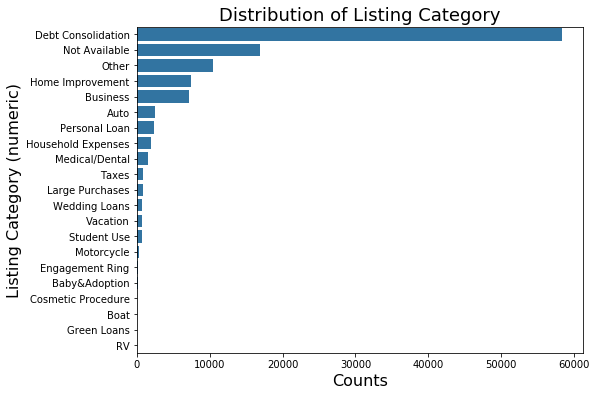

In [13]:
# Setting the Index in prep for barh
type_order = loan_clean["ListingCategory (text)"].value_counts().index

# Plotting thw Distributions of Listing Category
fig, ax = plt.subplots(figsize=(8, 6))
base_color = sb.color_palette()[0]
sb.countplot(data=loan_clean, y='ListingCategory (text)', color=base_color,  order = type_order)

# Funtion definig labels and title
x_y_t('Counts', 'Listing Category (numeric)', 'Distribution of Listing Category')
plt.show();

The most prominent reason why borrowers need loans is for Debt Consolidation. This means borrowers take out a new loan to pay off previous liabilities and consumer debts. The multiple debts may be combined into a single, larger debt, usually with more favourable payoff terms. Lenders need to be aware of these various reasons for funds.

Whether this reason affects borrowers' rating and APR will be investigated later on.

### Distribution of Loan Term 
The length of the loan expressed in months.

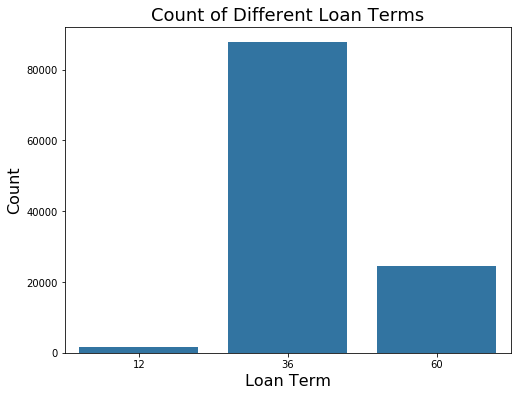

In [14]:
# plotting the Term of loan
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_clean, x = 'Term', color = base_color);

# Funtion definig labels and title
x_y_t('Loan Term', 'Count', 'Count of Different Loan Terms')

As observed above, the most loan term is <b>36 months</b>, followed by 60 months and 12months respectively. This means that lenders are more willing to committ their funds to mid-term loan than long and short terms. A relationship between Loan Term and Borrowers APR will help to bring clarity to whether the 36month term loan have higher APR than than the two other terms.

### Distribution of Types of Interest
When giving out loans, lenders are should keep in mind that an advertised interest rate isn’t the same as your loan’s annual percentage rate (APR). What’s the difference?

In [15]:
# Copying Dataset to preserve original
loan_another = loan_clean.copy()

# Remove loans with missing BorrowerAPR_new and BorrewerRate_new null rows
loan_another = loan_another[~loan_another["BorrowerAPR"].isna()]
loan_another = loan_another[~loan_another["BorrowerRate"].isna()]

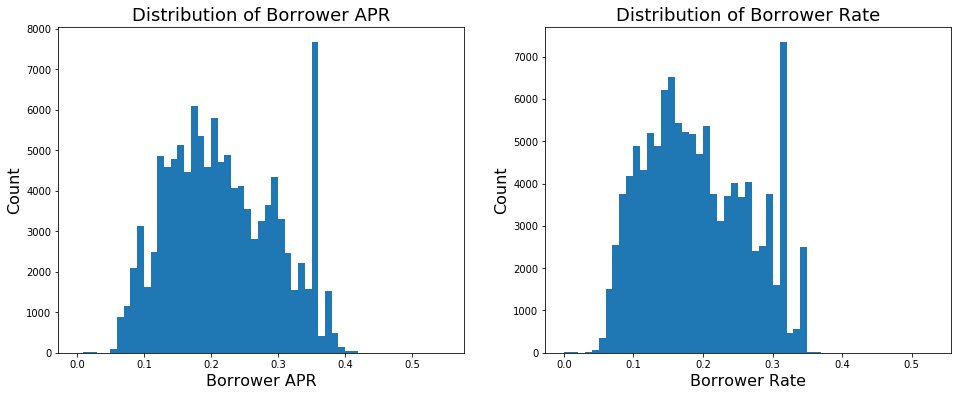

In [16]:
# Making a histogram of BorrowerAPR

plt.figure(figsize = [16, 6])

plt.subplot(1,2,1)
bins = np.arange(0, loan_another["BorrowerAPR"].max()+0.04, 0.01)
plt.hist(data = loan_another, x = 'BorrowerAPR', bins = bins);
# Funtion definig labels and title
x_y_t('Borrower APR', 'Count', 'Distribution of Borrower APR');

# Making a histogram of BorrowerRate
plt.subplot(1,2,2)
bins = np.arange(0, loan_another["BorrowerRate"].max()+0.04, 0.01)
plt.hist(data = loan_another, x = 'BorrowerRate', bins = bins);
# Funtion definig labels and title
x_y_t('Borrower Rate', 'Count', 'Distribution of Borrower Rate')

While the interest rate determines the cost of borrowing money, the APR is a more accurate picture of total borrowing cost because it takes into consideration other costs associated with procuring a loan, particularly a mortgage. When determining which loan provider to borrow money from, it is crucial to pay attention to the APR, meaning the real cost of financing.

The Federal Truth in Lending Act requires that every consumer loan agreement disclose the APR. Since all lenders must follow the same rules to ensure the accuracy of the APR, borrowers can use the APR as a good basis for comparing certain costs of loans. 

From the histogram above, only a few borrowers have APR and Rates greater than 43% and 34% repectively. 

In [17]:
# Confirming borrowers with APRs greater than 43%
loan_another[loan_another["BorrowerAPR"] > 0.43]

,Term,CreditGrade,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ListingCategory (numeric),Occupation,ProsperScore,EmploymentStatus,EmploymentStatusDuration,LoanOriginalAmount,LoanOriginationDate,StatedMonthlyIncome,DebtToIncomeRatio,BorrowerState,IsBorrowerHomeowner,TotalProsperLoans,ListingCategory (text)
18326,36,HR,Defaulted,0.45857,0.4500,0.4325,NaN,0,NaN,NaN,NaN,NaN,3000,2006-03-15 00:00:00,10000.000000,0.10252,NaN,False,NaN,Not Available
22195,36,HR,Chargedoff,0.46201,0.4500,0.4325,NaN,0,NaN,NaN,NaN,NaN,1789,2006-03-17 00:00:00,2916.666667,0.35430,NaN,False,NaN,Not Available
36018,36,HR,Completed,0.51229,0.4975,0.4925,NaN,0,NaN,NaN,NaN,NaN,1500,2006-02-27 00:00:00,2838.000000,0.02852,NaN,False,NaN,Not Available
56761,36,HR,Defaulted,0.50633,0.4975,0.4800,NaN,0,NaN,NaN,NaN,NaN,3000,2006-03-21 00:00:00,0.000000,0.03909,NaN,False,NaN,Not Available
82043,36,HR,Defaulted,0.48873,0.4800,0.4750,NaN,0,NaN,NaN,NaN,NaN,3000,2006-03-07 00:00:00,1583.333333,0.10021,NaN,False,NaN,Not Available
103973,36,HR,Defaulted,0.45857,0.4500,0.4325,NaN,0,NaN,NaN,NaN,NaN,2800,2006-03-09 00:00:00,3750.000000,0.19413,NaN,False,NaN,Not Available


In [18]:
# Average LenderYield
Another = loan_another[loan_another["BorrowerAPR"] > 0.43]

# Average Yield
Another['LenderYield'].sum() / len(Another['LenderYield'])

0.45750000000000002

- The loans with Borrower's APR greater than 43%, as seen above, all have a 36 months loan term and an average lender yield of 45.75%

In [19]:
# Confirming borrowers with interest rates greater than 34%
loan_another[loan_another["BorrowerRate"] > 0.34]

,Term,CreditGrade,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ListingCategory (numeric),Occupation,ProsperScore,EmploymentStatus,EmploymentStatusDuration,LoanOriginalAmount,LoanOriginationDate,StatedMonthlyIncome,DebtToIncomeRatio,BorrowerState,IsBorrowerHomeowner,TotalProsperLoans,ListingCategory (text)
241,36,E,Completed,0.37453,0.3500,0.3400,NaN,7,Administrative Assistant,NaN,Full-time,5.0,1100,2008-07-08 00:00:00,2702.916667,0.18,NJ,False,1.0,Other
269,36,NaN,Completed,0.37402,0.3495,0.3395,HR,1,Other,5.0,Full-time,63.0,2500,2010-05-20 00:00:00,3958.333333,0.37,OH,False,1.0,Debt Consolidation
305,36,NaN,Completed,0.38486,0.3435,0.3335,E,6,Other,5.0,Employed,75.0,1500,2010-09-21 00:00:00,2916.666667,0.20,KS,True,NaN,Auto
341,36,HR,Chargedoff,0.37352,0.3490,0.3390,NaN,1,Administrative Assistant,NaN,Full-time,13.0,2000,2008-09-17 00:00:00,3750.000000,0.13,AR,True,NaN,Debt Consolidation
369,36,E,Chargedoff,0.37453,0.3500,0.3400,NaN,1,Food Service,NaN,Full-time,12.0,1000,2008-09-08 00:00:00,1900.000000,0.34,CA,False,NaN,Debt Consolidation
372,36,D,Chargedoff,0.37453,0.3500,0.3400,NaN,1,Postal Service,NaN,Full-time,33.0,3800,2008-07-31 00:00:00,3333.333333,NaN,MI,True,NaN,Debt Consolidation
415,36,NaN,Completed,0.38058,0.3435,0.3335,E,1,Professional,5.0,Employed,103.0,7500,2010-09-10 00:00:00,4333.333333,0.20,AZ,False,NaN,Debt Consolidation
480,36,C,Completed,0.37453,0.3500,0.3400,NaN,1,Waiter/Waitress,NaN,Part-time,61.0,6000,2008-04-02 00:00:00,1625.000000,0.95,CA,False,NaN,Debt Consolidation
543,36,NaN,Chargedoff,0.37453,0.3500,0.3400,HR,2,Truck Driver,5.0,Full-time,66.0,3000,2010-01-26 00:00:00,4166.666667,0.13,IL,False,NaN,Home Improvement
555,36,D,Chargedoff,0.37453,0.3500,0.3400,NaN,7,Analyst,NaN,Full-time,182.0,2800,2008-10-15 00:00:00,4419.750000,0.03,FL,True,NaN,Other


In [20]:
# Average LenderYield
B_another = loan_another[loan_another["BorrowerRate"] > 0.34]

B_another['Term'].value_counts()
#Average Yield
B_another['LenderYield'].sum() / len(B_another['LenderYield'])

0.33936396728016355

- The loans with Borrower's Rate greater than 34%, as seen above, all have a 36 months loan term and an average lender yield of 33.94%.

> **Interest Rates definitely affect APR, as APRs are usually higher than interest rates, as explained above.**

### Distribution of Debt-to-Income Ratio

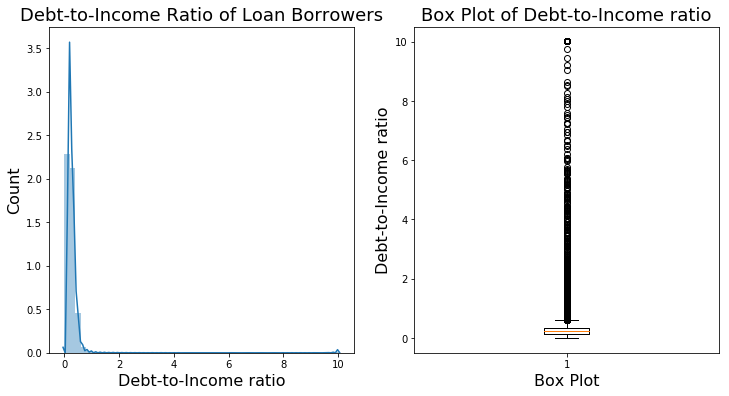

In [21]:
# Dropping null values
loan_clean['DebtToIncomeRatio'].dropna(inplace=True)

plt.figure(figsize = [12,6])

#Left plot:
# Making a histogram of DebtToIncomeRatio
plt.subplot(1,2,1)
sb.distplot(loan_clean['DebtToIncomeRatio'], kde=True, bins=50);
# Funtion definig labels and title
x_y_t('Debt-to-Income ratio', 'Count', 'Debt-to-Income Ratio of Loan Borrowers')


# Right plot: Outliers
# Boxplot to identify otliers
plt.subplot(1,2,2)
plt.boxplot(loan_clean['DebtToIncomeRatio']);
# Funtion definig labels and title
x_y_t('Box Plot', 'Debt-to-Income ratio', 'Box Plot of Debt-to-Income ratio')

This plot is akwardly rightly skewed, and its an evidence that there are outliers in the plot. A closer look at the plot will reveal more information about the Debt-to-Income ratio

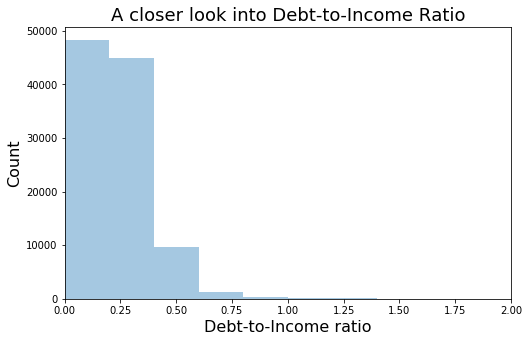

In [22]:
# plot for a smaller xlimit
plt.figure(figsize = [8,5])
sb.distplot(loan_clean['DebtToIncomeRatio'], kde=False, bins=50);
plt.xlim(xmin=0, xmax=2);

# Funtion definig labels and title
x_y_t('Debt-to-Income ratio', 'Count', 'A closer look into Debt-to-Income Ratio')

A closer look into the plot shows a great fall in Debt to Income ration at around 37.5%. According to the <a href="https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/">Consumer Financial Protection Bureau</a>, an acceptable debt-to-income ratio should be at or below 43 percent.

To understand the impact of debt-to-income ratio on loans, a bivariate analysis must be run

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In an Attempt to study the features that affect bprrower APR I analysed the foolowing and I gained insight.
- Lenders should depend on this Prosper rating for better decisions with the funds they deploy to mitigate against the risk of loossing their funds, even though Prosper <a href="https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline">declares</a> that the estimated loss rates are not a guarantee and actual performance may differ from expected performance.
- The most prominent reason why borrowers need loans is for Debt Consolidation.
- Borrowers prefer <b>36 months</b>, Loan Term above 60 months and 12months respectively. 
- The loans with Borrower's APR greater than 43%, as seen above, all have a 36 months loan term and an average lender yield of 45.75%. Also, the loans with Borrower's Rate greater than 34%, all have a 36 months loan term and an average lender yield of 33.94%.
- Interest Rates definitely affect APR, as APRs are usually higher than interest rates, as explained above.
- There's great fall in Debt to Income ratio, at around 37.5%. According to the <a href="https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/">Consumer Financial Protection Bureau</a>, an acceptable debt-to-income ratio should be at or below 43 percent.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the unusual feature, The Debt-to-Income Ratio was unusually skewed, with a lot of outliers as observed.

> So as to have a tidy data to work with,
- I created a `Listing Category (text)` so as to properly study the purposes for loan.
- I sliced a copy of the dataframe by the not null rows of `BorrowerAPR` and `BorrowerRate`, so as to preserve my initial dataset.
- Lastly, I dropped rows with 'NaN' values in the `ProsperRating (Alpha)` column.

<span style="float:right">[Back to Top](#top)</span>
<a id="biva"></a>
## Bivariate Exploration
Here, I test the distributions above and more to see their effect on Borrowe APR.
___

### Relationship Between CreditngGrade, ProsperRating (Alpha) and Borrower APR

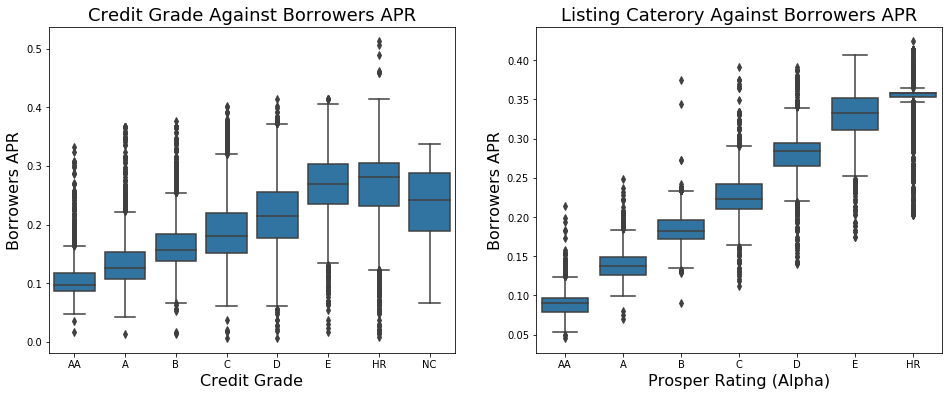

In [23]:
# box plot
plt.figure(figsize = [16, 6])

# Left Plot
plt.subplot(1,2,1)
sb.boxplot(data=loan_clean, x='CreditGrade', y='BorrowerAPR', color=base_color, order=cg_order);
# Funtion definig labels and title
x_y_t('Credit Grade', "Borrowers APR", 'Credit Grade Against Borrowers APR')

# Right Plot
plt.subplot(1,2,2)
sb.boxplot(data=loan_clean, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color, order=pr_A_order);
# Funtion definig labels and title
x_y_t('Prosper Rating (Alpha)', "Borrowers APR", 'Listing Caterory Against Borrowers APR')

The plots above shows that there are outliers for both Grading type. It is however certain that Lenders consider more than just the CreditGrade and Listing Category to determine APR.

> **Credit Grade:**
- All APRs range from a minimum of 0% to a maximum of 54%, except for *NC* grade category that has a minimum of about 8%.
- With and without consideration to Outliers, the HR Grade seem to have attracted the highest APR value, maxing out at about 41% - 54%.
- This may be a confusing rating system to apply for Lenders.

>  **Prosper ating:**
- All APRs, with or without outliers, have different minimums and maximum values.
- With consideration to outliers, _HR_ ratings have the highest values, for maximun and minimum values.
- Without consideration to outliers, _AA_ ratings have the lowest minimum and maximun value.
- This rating appears to be better than, and more reliable than _Credit Grading_ as the __Prosper Rating__ does in deed proof superiority from AA down HR, as stated by Prosper, with their APR increasing from AA through HR; from 5% to about 45%

> **Good Rating reduces APR and poor Ratings increases APR, for Obvious reasons**

### Relationship between Purpose of Loan(ListingCategory) and Borrower APR

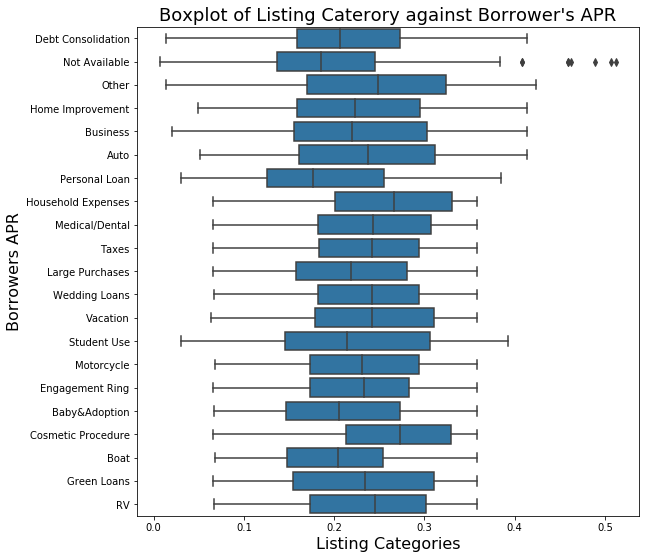

In [24]:
# box plot
plt.figure(figsize=(9, 9))
sb.boxplot(data=loan_clean, y='ListingCategory (text)', x='BorrowerAPR', color=base_color, order = type_order);
# Funtion definig labels and title
x_y_t('Listing Categories', "Borrowers APR", "Boxplot of Listing Caterory against Borrower's APR")

The Plot above is helpful as it is now clear that Lenders require higher APRs for Debt Consolidation, Home Improvement, Business, Autos, Personal loan and student use than all other purposes of loan; that ranges with similar minimums and maximums, except for __Not available__ and __Other__ categories, which are clearly higher than all; either by oulier or maximum values, respectively.

**This further proves that Lenders are interested in the purpose for loans, and these purposes affect APRs**

### Relationship between Loan Term and Borrower ARP

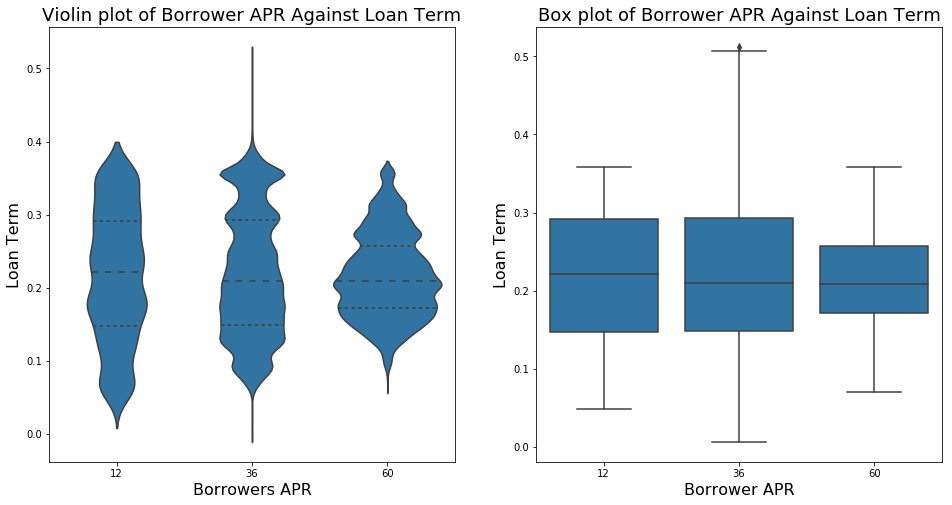

In [25]:
# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[0]

# LEFT plot: Violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data=loan_clean, x='Term', y='BorrowerAPR', color=base_color, inner='quartile');
# Funtion definig labels and title
x_y_t("Borrowers APR", "Loan Term",  "Violin plot of Borrower APR Against Loan Term")


# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loan_clean, x='Term', y='BorrowerAPR', color=base_color);
# Funtion definig labels and title
x_y_t("Borrower APR", "Loan Term", "Box plot of Borrower APR Against Loan Term")

**36 Months loan term, truely attracts higher APR tah all other Terms. On the average, 12 Months Loan term is higher than both.**

The category or purpose of loan that populates the 36 months gap will be observed later, as this will throw light of their various effects on APR

### Relationship Between Loan Status and Proper Rating

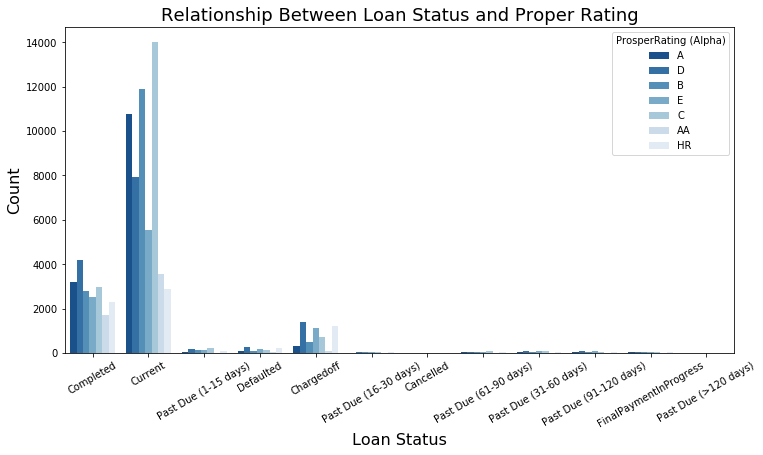

In [26]:
# plot
plt.figure(figsize = [12, 6])
sb.countplot(data = loan_clean, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues_r')
# Funtion definig labels and title
x_y_t("Loan Status", "Count", "Relationship Between Loan Status and Proper Rating")
plt.xticks(rotation=30);

The figure above shows that the Highest of all ratings come from borrowers currently servicing loans. They are the best and worst at the Rating. Lenders will need to juxtapose this analysis with others made above to further strengthen their conviction of the right APR.

### Relationship between Debt-to-Income ratio and Borrower APR

In [27]:
print("Total number of rows in DebtToIncomeRatio column before dropping: ", loan_clean['DebtToIncomeRatio'].shape)
print("Total number of rows in BorrowerAPR column before dropping: ", loan_clean['BorrowerAPR'].shape)

# Subsetting the two columns before drop
new = loan_clean[['DebtToIncomeRatio', 'BorrowerAPR']]
new = new.dropna()
print("Total number of rows in the new DataFrame: ", new.shape)

Total number of rows in DebtToIncomeRatio column before dropping:  (105383,)
Total number of rows in BorrowerAPR column before dropping:  (113937,)
Total number of rows in the new DataFrame:  (105358, 2)


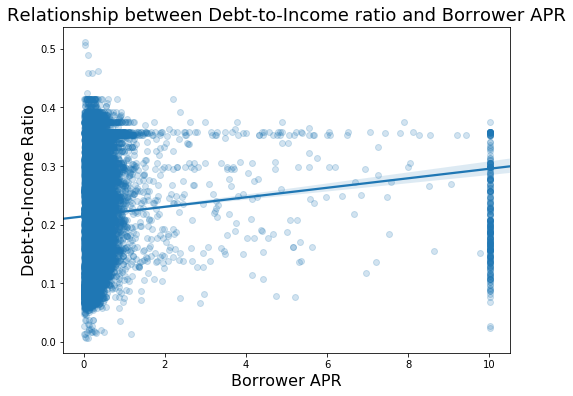

In [28]:
# Relatinship plot between both variables
plt.figure(figsize = [8, 6])
sb.regplot(data = new, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws={'alpha':0.2});
# Funtion definig labels and title
x_y_t("Borrower APR", "Debt-to-Income Ratio", "Relationship between Debt-to-Income ratio and Borrower APR")

The plot above suggests an up trend in the relationship between Borrowers' APR and their Debt-to-Income ratio.

This suggests that Lenders demand an APR between 20% to 30% for increasing Debt-to-Income ratio

### Relationship between Loan Status and Employment Status

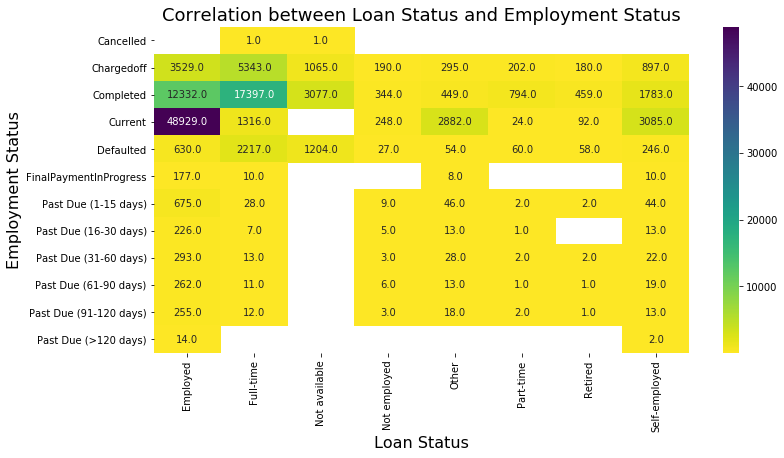

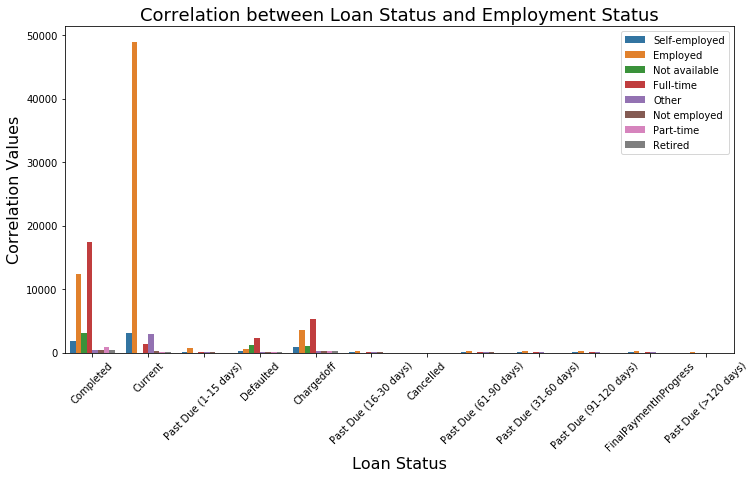

In [29]:
new_count = loan_clean.groupby(['LoanStatus', 'EmploymentStatus']).size()
new_count = new_count.reset_index(name='count')
new_count = new_count.pivot(index='LoanStatus', columns='EmploymentStatus', values='count')



# Top plot: heatmap
plt.figure(figsize = [12, 6])
sb.heatmap(new_count, annot=True, fmt='.1f', cmap='viridis_r');
# Funtion definig labels and title
x_y_t("Loan Status", "Employment Status", "Correlation between Loan Status and Employment Status")

# Bottom plot: box plot
plt.figure(figsize = [12, 6])
sb.countplot(data = loan_clean, x = 'LoanStatus', hue = 'EmploymentStatus')
# Funtion definig labels and title
x_y_t("Loan Status", "Correlation Values", "Correlation between Loan Status and Employment Status")
plt.xticks(rotation=45),
plt.legend(loc='upper right');

The plots above the Employed employment status is most correlated with current loan status. 
Lenders should rather committ the funds most to employed borrowers who mostlikely work full-time to be most guaranteed of no loss.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Analysis proved the following:<br>
>**For Credit Grade:**
- All APRs range from a minimum of 0% to a maximum of 54%, except for *NC* grade category that has a minimum of about 8%.
- With and without consideration to Outliers, the HR Grade seem to have attracted the highest APR value, maxing out at about 41% - 54%.
- This may be a confusing rating system to apply for Lenders.

>**For Prosper ating:**
- All APRs, with or without outliers, have different minimums and maximum values.
- With consideration to outliers, _HR_ ratings have the highest values, for maximun and minimum values.
- Without consideration to outliers, _AA_ ratings have the lowest minimum and maximun value.
- This rating appears to be better than, and more reliable than _Credit Grading_ as the __Prosper Rating__ does in deed proof superiority from AA down HR, as stated by Prosper, with their APR increasing from AA through HR; from 5% to about 45%
- **Good Rating reduces APR and poor Ratings increases APR, for Obvious reasons**

>- It is clear that Lenders require higher APRs for Debt Consolidation, Home Improvement, Business, Autos, Personal loan and student use than all other purposes of loan; that ranges with similar minimums and maximums, except for __Not available__ and __Other__ categories, which are clearly higher than all; either by oulier or maximum values, respectively 
- Borrowers APR appears to be at the highes at 36months loan Term. However, at 20% APR, the 60month loam term seem to benefit more and thin out as the APR increases, which eventually fissles out at APR of about 38%. On the other hand, the 12months loan Term seem to fairly more comfortable with APR between 18% to 35%
- Furthermore,  the highest of all ratings come from borrowers currently servicing loans. They are the best and worst at the Rating. This further corroborate the bias of Lenders to the purpose of loan.
- There is and up trend in the relationship between Borrowers' APR and their Debt-to-Income ratio. This suggests that Lenders demand an APR between 20% to 30% for increasing Debt-to-Income ratio.
- The EMPLOYED status is most correlated with CURRENT loan status. This suggest that lender may prefer to committ the funds most to employed borrowers who mostlikely work full-time.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Relationship between LoanStatus and EmploymentStatus helped to give insight into the the class of borrowers that may be best to committ lenders fund to; the Full time Employed workers.

<span style="float:right">[Back to Top](#top)</span>
<a id="multi"></a>
## Multivariate Exploration
I compare different features on a 3 dimensioanl scale
___

### Relationship between Borrrowers' ARP, Loan Status and Term of loan

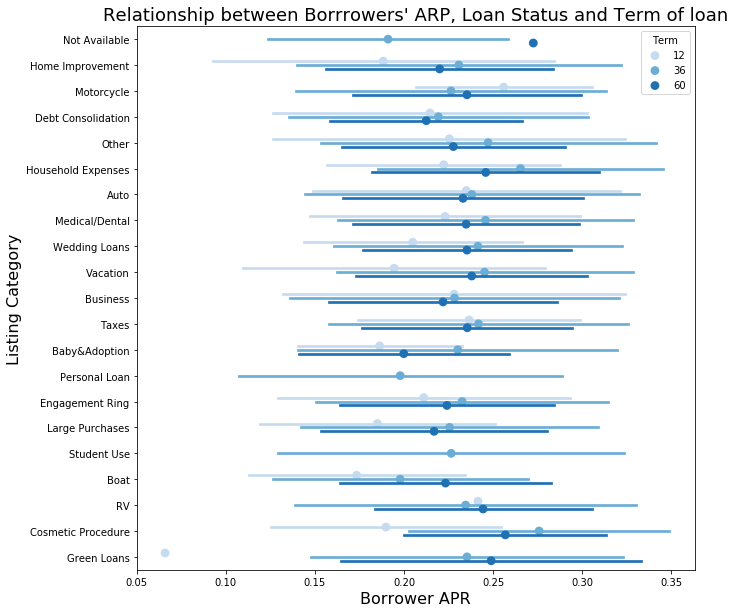

In [30]:
# Plot a multivariate
plt.figure(figsize = [10, 10])
sb.pointplot(data = loan_clean, 
             x = 'BorrowerAPR', 
             y = 'ListingCategory (text)', 
             hue = 'Term',
             palette = 'Blues', 
             linestyles = '', 
             dodge = 0.3, 
             ci='sd')
# Funtion definig labels and title
x_y_t("Borrower APR", "Listing Category", "Relationship between Borrrowers' ARP, Loan Status and Term of loan")

The plot above shows the relationship between BorrrowerARP, LoanStatus and Term.

- Over the 12 months Term, Other and Business have the highest APR ata about 33%, followed by loans for Auto, Taxes and RV, respectively.
- Over the 36 months Term, Household expense and Cosmetic Procedure are the highest APRs at about 35.5% each, followed by Other, Medical/Dental, Vacation and Wedding Loans, respectively.
- Over the 60 months Term, Green Loan has the highest APR at about 34%, followed by Cosmetic procedure, Household expense and Vacation, respectively.

### Relationship between Loan Status, Stated Monthly Income and Borrowers' APR

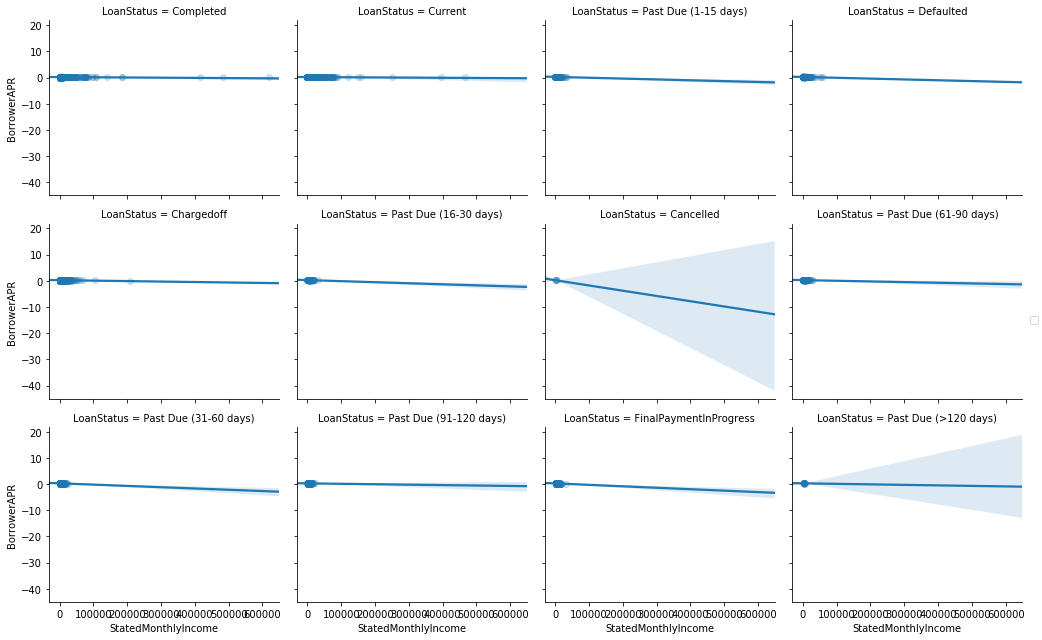

In [31]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_clean, aspect=1.2, col='LoanStatus', col_wrap=4, margin_titles=True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.2});
g.add_legend();

The most populated FacetGrids are the Completed and Current Loan Status. All other Loan status have different degrees of negative trends with APR. This confirms that Only Lenders will likely give out more loans to Borrowers that complete payment and those that are currently servicing their loans, and all other will face diffrent levels of bias.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Loan term plays out differently on diffrent loan purpose and they definitely affect APRs. Lenders are interested in where there money will be spent and on what.
Also, Loan Status also contribue its effect on APR. Lenders prefer borrowers that have completed repayment and those that are currently servicing their debt.

### Were there any interesting or surprising interactions between features?

> The effect of the different loan purpose in the face on Term on Borrower APR changed due to Lenders' perception of borrowers rating.

<a id="conclu"></a>
## Conclusion

Borrower APR is affected by the feature analyzed above at diffrent degrees. However, a conbination of the feature may create a totally diffrent perception and effect on  borrowers APR.

<span style="float:right">[Back to top](#top)</span>